In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'Monospace'
plt.rcParams['figure.figsize'] = [8,6]

Plot the potential in $\phi$ and $\theta$ for small EL for zero and half flux bias.

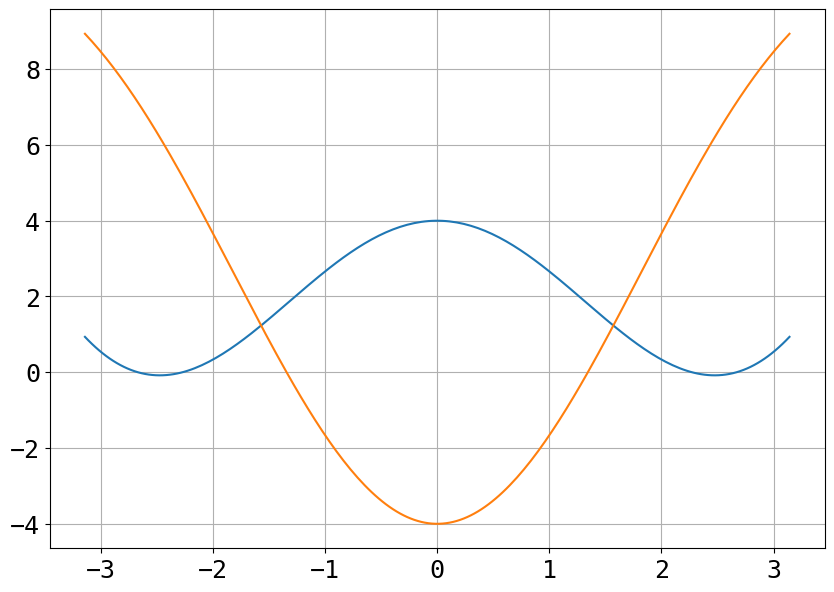

In [8]:
x = np.linspace(-np.pi, np.pi, 200)

y1 = x**2/2 + 4*np.cos(x)
y2 = x**2/2 + 4*np.cos(x + np.pi)

plt.plot(x,y1)
plt.plot(x,y2)